In [1]:
import sys
import numpy as np
#import logging
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataset as dataset
import snelib19odp.lc.observables as observables

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
#logging.basicConfig(level=logging.DEBUG)
import seaborn
import astropy.time as time

In [2]:
ds = dataset.load_dataset('SN2019odp_phot')

       mjd         band   mag   mag_err  maglim telescope instrument
------------------ ---- ------- ------- ------- --------- ----------
58718.171532724984 UVW1 21.1707  0.3498 21.2422     Swift       UVOT
 58718.17296719598    U 20.4926  0.3356 20.6174     Swift       UVOT
58718.173944388516    B 18.9096  0.1832 19.9058     Swift       UVOT
 58718.17632610677 UVW2 22.8054  0.5947 22.0495     Swift       UVOT
 58718.17869199114    V 18.5903  0.2777  18.981     Swift       UVOT
 58718.18644587137 UVM2 22.4146  0.2873 22.7858     Swift       UVOT
58719.476249458734 UVW1 21.2914  0.2713 21.7586     Swift       UVOT
 58719.47768546175    U 20.6638  0.2699  21.086     Swift       UVOT
58719.478660993744    B 18.7056  0.1176 20.3376     Swift       UVOT
 58719.48103849823 UVW2 22.2051  0.3022 22.5072     Swift       UVOT
               ...  ...     ...     ...     ...       ...        ...
 58721.96560227778    U 19.6001  0.1871 20.6589     Swift       UVOT
 58721.96663642116    B 18.0553  0

../lib/snelib19odp/dataset.py:485: RuntimeWarning: invalid value encountered in log10
  ds['mag'] = -2.5*np.log10(ds['ampl']) + ds['magzp']


In [3]:
ds.get_combined_lc('g');
ds.get_combined_lc('g')

/usr/lib/python3/dist-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


<Table length=80>
      sigma             sigma.err             ampl        ... issub isdiffpos
     float64             float64            float64       ...  str5    str4  
------------------ ------------------- ------------------ ... ----- ---------
 5.019048789272439  0.1453871691987656  4605.345681391524 ...    --        --
 9.184468245595319  0.2636963406672404  7782.600072698882 ...    --        --
10.144355640294936 0.28890516819398504  241.6953187792395 ...    --        --
27.448735561223543  0.7884957167202911  5773.139868739195 ...    --        --
 6.356880191522014  0.1855810349454782 1799.7584138878783 ...    --        --
 6.029885796929415  0.1736800152221162  6119.863880288343 ...    --        --
 7.030504053333468 0.19637935435815262 1557.0128225078124 ...    --        --
 22.09547963608696  0.6384546872307441  6146.271134825667 ...    --        --
 6.121565241236139  0.1750881188856251 1900.8329815666925 ...    --        --
 6.654886326040032 0.19339191918665963  85.58135924865181 ...    --        --
               ...                 ...                ... ...   ...       ...
                --                  --                 -- ...    --        --
                --                  --                 -- ...  True      True
                --                  --                 -- ...  True      True
                --                  --                 -- ...  True      True
                --                  --                 -- ...  True      True
                --                  --                 -- ...  True      True
                --                  --                 -- ...  True      True
                --                  --                 -- ...  True      True
                --                  --                 -- ...  True      True
                --                  --                 -- ...  True      True

In [4]:
ds.get_interpolated('g')

array([18.11816113, 18.11816113, 18.11816113, ..., 21.36674176,
       21.36991787, 21.37309397])

In [5]:
interpolator = ds.get_interpolator('g')
list(map(lambda x: x['dmag_extinct'], interpolator.sub_datasets))

[<Column name='dmag_extinct' dtype='float64' length=66>
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
                 ...
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001,
 <Column name='dmag_extinct' dtype='float64' length=5>
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001,
 <Column name='dmag_extinct' dtype='float64' length=9>
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001
 -0.5615100000000001]

In [6]:
#interpolator.make_fit_diagnostics()
#interpolator.save_fit_data()

In [7]:
obs = observables.Observables(ds)
obs_basic = obs.basic('g')
obs_basic

<Table length=1000>
    peak_time           peak_mag      ...     peak_width       rise_timescale  
     float64            float64       ...      float64            float64      
------------------ ------------------ ... ------------------ ------------------
 58733.84584584585 15.973737006063772 ... 15.004599008410525  8.540505313016304
 58733.73373373373 15.960469807112924 ... 15.065779671421325  8.662862029957576
 58734.11811811812 15.974225462846064 ... 13.652987723084493 4.8964539683935016
 58733.87787787788 15.946862449006877 ... 14.810291149031269  8.617733226732412
  58733.7017017017 15.971058334028376 ... 14.375815035984978  6.151529784065337
58733.861861861864 16.002118484561105 ... 14.812651769430074  9.035250143095558
 58733.92592592593 15.966009057429858 ... 15.119156532454387  8.909786384874717
 58733.76576576577 15.965584603336934 ...  16.22118188106477  9.368469522680313
 58733.82982982983  15.95252355132424 ...  14.41133240888433  5.667625473464547
58733.333333333336 15.961235330393361 ... 15.110810241988608 6.7731219659824164
               ...                ... ...                ...                ...
58733.781781781785  15.95600027964878 ... 15.382220587420974 10.865920610004828
 58733.49349349349 15.970369059662017 ... 16.337702176675936  8.692942318645931
 58733.76576576577 15.936515154443683 ... 16.014863687957792 12.595657537833237
 58733.50950950951 15.968861805079078 ... 15.209393818282278   9.55252562455901
58733.749749749746 15.961786819074376 ... 15.052711105929689   8.36516124109883
 58733.90990990991 15.979361378697416 ...   15.3764053482444  9.558367133399301
 58734.23023023023 15.958687873054739 ... 13.657095481589792 7.5701390964455575
58733.781781781785 15.940912036355426 ... 15.397509784239146 12.255158596759225
 58733.36536536537 15.953891850716937 ...  15.21062780177353  9.455265516765031
 58734.03803803804 15.942334787863212 ... 13.219339574248965  5.597247934644211

<AxesSubplot:ylabel='Count'>

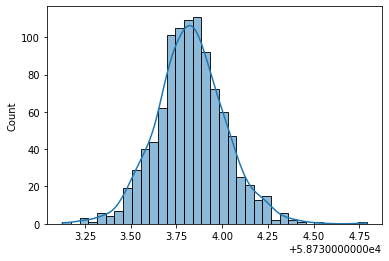

In [8]:
seaborn.histplot(obs_basic['peak_time'], kde=True)

<AxesSubplot:ylabel='Count'>

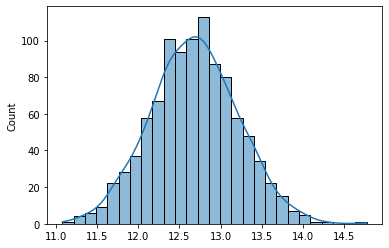

In [9]:
seaborn.histplot(obs_basic['linear_slope'], kde=True)

<AxesSubplot:ylabel='Count'>

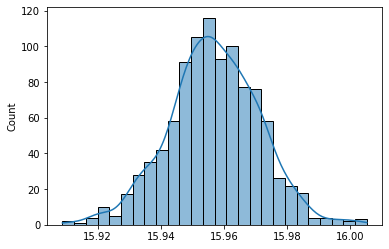

In [10]:
seaborn.histplot(obs_basic['peak_mag'], kde=True)

<AxesSubplot:ylabel='Count'>

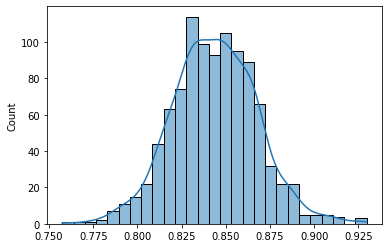

In [11]:
seaborn.histplot(obs_basic['delta_m15'], kde=True)

<AxesSubplot:ylabel='Count'>

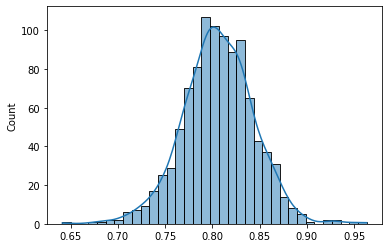

In [12]:
seaborn.histplot(obs_basic['delta_m-10'], kde=True)

In [13]:
ds1 = dataset.load_dataset('iPTF13bvn')
obs1 = observables.Observables(ds1).basic('r')
ds2 = dataset.load_dataset('SN1998bw')
obs2 = observables.Observables(ds2).basic("Rc")

seaborn.kdeplot(x=obs1['delta_m15'], y=obs1['delta_m-10'], label='iPTF13bvn')
seaborn.kdeplot(x=obs2['delta_m15'], y=obs2['delta_m-10'], label='SN1998bw')

plt.xlabel(r'$\Delta m_{15} (r/R)$')
plt.ylabel(r'$\Delta m_{-10} (r/R)$')
plt.legend()

/usr/lib/python3/dist-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/usr/lib/python3/dist-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
1090it [00:04, 132.92it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 4233 | eff(%): 23.030 | loglstar:   -inf < -4986.969 <    inf | logz: -4996.053 +/-  0.190 | dlogz: 5017.528 >  0.010]    Traceback (most recent call last):
  File "/home/welterde/.local/lib/python3.9/site-packages/dynesty/dynesty.py", line 982, in __call__
    return self.func(x, *self.args, **self.kwargs)
  File "../lib/snelib19odp/lc/interpolate.py", line 456, in lnprob2
    return self.gp.log_likelihood(self.y+offsets, quiet=True)
  File "/home/w

Exception while calling loglikelihood function:
  params: [ 1.52387820e+01  3.16036174e+01 -9.67299686e-01  5.09508840e+04
  3.77806033e+01  5.08966605e+04  1.20584144e+00  2.11671082e+01
 -9.04196785e+00  2.08304005e+00]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

In [ ]:
def plot_ds(dsname, band):
    ds = dataset.load_dataset(dsname)
    obs = observables.Observables(ds).basic(band)
    seaborn.kdeplot(x=obs['delta_m15'], y=obs['delta_m-10'], label='%s %s' % (dsname, band))
    
plot_ds('iPTF13bvn', 'r')
plot_ds('SN1998bw', 'Rc')
plot_ds('SN2019odp_phot', 'r')
plot_ds('SN2008D', 'r')
#plot_ds('SN2002ap', 'V')


plt.xlabel(r'$\Delta m_{15} (r/R)$')
plt.ylabel(r'$\Delta m_{-10} (r/R)$')
plt.legend()

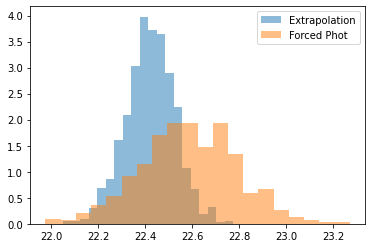

In [19]:
# my NOT r-band forced photometry datapoint
interpolator = ds.get_interpolator('r')
samples = np.empty(1000)
for i in range(1000):
    samples[i] = interpolator.sample_lc(59119, sample='random')[0]
plt.hist(samples, bins=20, alpha=0.5, color='tab:blue', label='Extrapolation', density=True)
plt.hist(np.random.normal(22.58, 0.21, size=1000), label='Forced Phot', bins=20, alpha=0.5, color='tab:orange', density=True)
plt.legend()

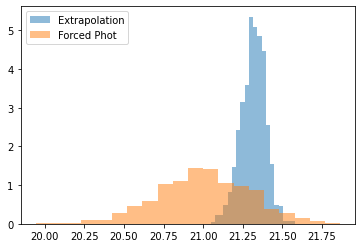

In [20]:
# LCOGT observations
interpolator = ds.get_interpolator('r')
samples = np.empty(1000)
for i in range(1000):
    samples[i] = interpolator.sample_lc(59046, sample='random')[0]
plt.hist(samples, bins=20, alpha=0.5, color='tab:blue', label='Extrapolation', density=True)
plt.hist(np.random.normal(21, 0.3, size=1000), label='Forced Phot', bins=20, alpha=0.5, color='tab:orange', density=True)
plt.legend()

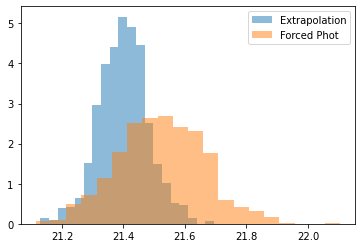

In [21]:
# LT observations (r)
interpolator = ds.get_interpolator('r')
samples = np.empty(1000)
for i in range(1000):
    samples[i] = interpolator.sample_lc(59052, sample='random')[0]
plt.hist(samples, bins=20, alpha=0.5, color='tab:blue', label='Extrapolation', density=True)
plt.hist(np.random.normal(21.52, 0.14, size=1000), label='Forced Phot', bins=20, alpha=0.5, color='tab:orange', density=True)
plt.legend()

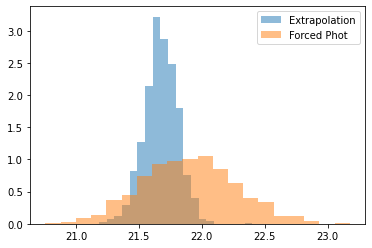

In [22]:
# LT observations (i)
interpolator = ds.get_interpolator('i')
samples = np.empty(1000)
for i in range(1000):
    samples[i] = interpolator.sample_lc(59052, sample='random')[0]
plt.hist(samples, bins=20, alpha=0.5, color='tab:blue', label='Extrapolation', density=True)
plt.hist(np.random.normal(21.89, 0.38, size=1000), label='Forced Phot', bins=20, alpha=0.5, color='tab:orange', density=True)
plt.legend()

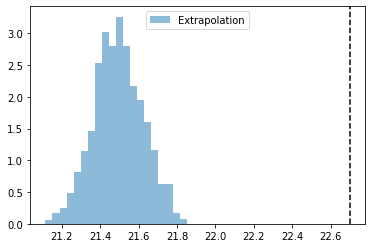

In [23]:
# P60 upper limit (g) @ 2020-07-26
interpolator = ds.get_interpolator('g')
samples = np.empty(1000)
for i in range(1000):
    samples[i] = interpolator.sample_lc(59056, sample='random')[0]
plt.hist(samples, bins=20, alpha=0.5, color='tab:blue', label='Extrapolation', density=True)
plt.axvline(22.7, ls='--', color='black')
plt.legend()

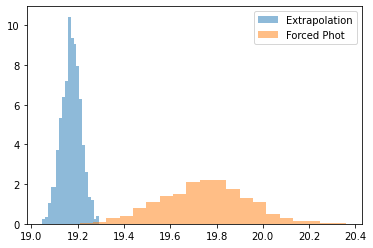

In [24]:
# P48 observations (g) 2020-01-25
interpolator = ds.get_interpolator('g')
samples = np.empty(1000)
for i in range(1000):
    samples[i] = interpolator.sample_lc(58873, sample='random')[0]
plt.hist(samples, bins=20, alpha=0.5, color='tab:blue', label='Extrapolation', density=True)
plt.hist(np.random.normal(19.75, 0.19, size=1000), label='Forced Phot', bins=20, alpha=0.5, color='tab:orange', density=True)
plt.legend()

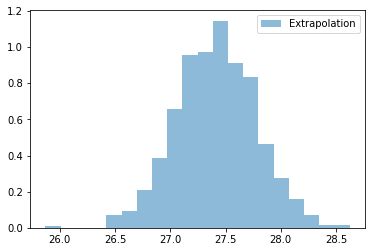

In [25]:
# Today estimate
interpolator = ds.get_interpolator('g')
samples = np.empty(1000)
for i in range(1000):
    samples[i] = interpolator.sample_lc(59521, sample='random')[0]
plt.hist(samples, bins=20, alpha=0.5, color='tab:blue', label='Extrapolation', density=True)
plt.legend()

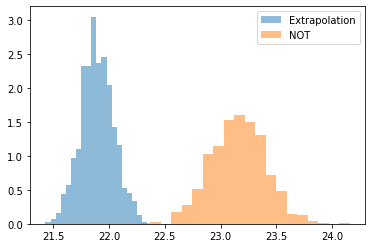

In [26]:
# NOT datapoint 2020-08-26 (g)
interpolator = ds.get_interpolator('g')
samples = np.empty(1000)
t = time.Time('2020-08-26').mjd
for i in range(1000):
    samples[i] = interpolator.sample_lc(t, sample='random')[0]
plt.hist(samples, bins=20, alpha=0.5, color='tab:blue', label='Extrapolation', density=True)
plt.hist(np.random.normal(23.16, 0.25, size=1000), bins=20, alpha=0.5, color='tab:orange', label='NOT', density=True)
plt.legend()

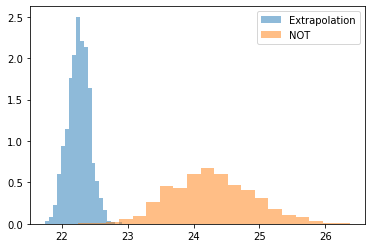

In [28]:
# NOT datapoint 2020-09-24 (g)
interpolator = ds.get_interpolator('g')
samples = np.empty(1000)
t = time.Time('2020-09-24').mjd
for i in range(1000):
    samples[i] = interpolator.sample_lc(t, sample='random')[0]
plt.hist(samples, bins=20, alpha=0.5, color='tab:blue', label='Extrapolation', density=True)
plt.hist(np.random.normal(24.28, 0.63, size=1000), bins=20, alpha=0.5, color='tab:orange', label='NOT', density=True)
plt.legend()

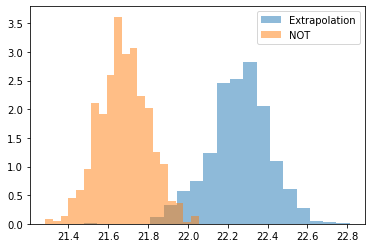

In [29]:
# NOT datapoint 2020-08-26 (i)
interpolator = ds.get_interpolator('i')
samples = np.empty(1000)
t = time.Time('2020-08-26').mjd
for i in range(1000):
    samples[i] = interpolator.sample_lc(t, sample='random')[0]
plt.hist(samples, bins=20, alpha=0.5, color='tab:blue', label='Extrapolation', density=True)
plt.hist(np.random.normal(21.68, 0.12, size=1000), bins=20, alpha=0.5, color='tab:orange', label='NOT', density=True)
plt.legend()

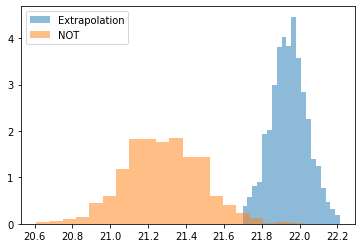

In [30]:
# NOT datapoint 2020-08-26 (r)
interpolator = ds.get_interpolator('r')
samples = np.empty(1000)
t = time.Time('2020-08-26').mjd
for i in range(1000):
    samples[i] = interpolator.sample_lc(t, sample='random')[0]
plt.hist(samples, bins=20, alpha=0.5, color='tab:blue', label='Extrapolation', density=True)
plt.hist(np.random.normal(21.28, 0.21, size=1000), bins=20, alpha=0.5, color='tab:orange', label='NOT', density=True)
plt.legend()

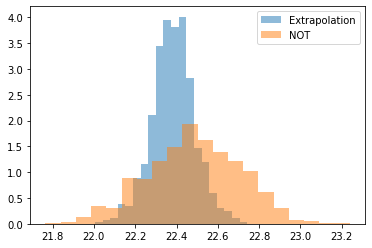

In [31]:
# NOT datapoint 2020-09-24 (r)
interpolator = ds.get_interpolator('r')
samples = np.empty(1000)
t = time.Time('2020-09-24').mjd
for i in range(1000):
    samples[i] = interpolator.sample_lc(t, sample='random')[0]
plt.hist(samples, bins=20, alpha=0.5, color='tab:blue', label='Extrapolation', density=True)
plt.hist(np.random.normal(22.49, 0.23, size=1000), bins=20, alpha=0.5, color='tab:orange', label='NOT', density=True)
plt.legend()

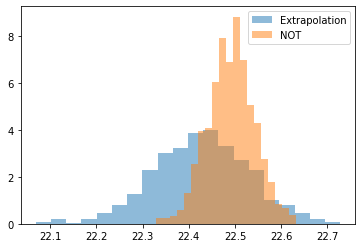

In [33]:
# NOT datapoint 2020-09-27 (r)
interpolator = ds.get_interpolator('r')
samples = np.empty(1000)
t = time.Time('2020-09-27').mjd
for i in range(1000):
    samples[i] = interpolator.sample_lc(t, sample='random')[0]
plt.hist(samples, bins=20, alpha=0.5, color='tab:blue', label='Extrapolation', density=True)
plt.hist(np.random.normal(22.491, 0.05, size=1000), bins=20, alpha=0.5, color='tab:orange', label='NOT', density=True)
plt.legend()